In [203]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import backend as K
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg
import cv2 as cv2
import random
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

ERROR! Session/line number was not unique in database. History logging moved to new session 738


In [2]:
#Si existe una sesion de keras (múltiples modelos) en segundo plano lo borra para liberar recursos 
K.clear_session()

## Comprobar Funcionamiento de GPU

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
tf.test.is_built_with_cuda()

True

## Cargar datos

In [5]:
#Informacion
dir_img=r'C:\Users\kvnsg\Desktop\ML\Proyecto\Images'
clases=[]

In [6]:
##Obtener clases
clases=os.listdir(dir_img)
print(clases)

['fresh_apple', 'fresh_banana', 'fresh_bitter_gourd', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_apple', 'stale_banana', 'stale_bitter_gourd', 'stale_capsicum', 'stale_orange', 'stale_tomato']


In [7]:
##Obtener un DF con las rutas de las imagenes y su correspondiente etiqueta
def loadImg(clases,dir_img):    
    dir_clase=[]
    nombreImg=[]
    rutaImg=[]
    list_dirimg=[]
    etiquetas=[]
    for i in clases:
        dir_clase=os.path.join(dir_img,i)#Obtener la ruta de cada clase
        if os.path.isdir(dir_clase):     #Pregunta si el directorio existe
            nombreImg=os.listdir(dir_clase)  
            for j in nombreImg:
                rutaImg=os.path.join(dir_clase,j)#Obtener la ruta de cada imagen
                list_dirimg.append(rutaImg)      #Agrega un ítem al final de la lista.     
                etiquetas.append(i) 
    Rseries= pd.Series(list_dirimg, name='ruta_imagenes') #Vector con datos indexados
    Eseries=pd.Series(etiquetas, name='Etiqueta')    
    df=pd.concat([Rseries, Eseries], axis=1)
    return df

In [8]:
#Datos originales

In [9]:
df=loadImg(clases,dir_img)

In [10]:
df

,ruta_imagenes,Etiqueta
0,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
1,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
2,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
3,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
4,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
...,...,...
14677,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato
14678,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato
14679,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato
14680,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato


In [11]:
df['Etiqueta'].value_counts()
                

stale_apple           2342
fresh_apple           1693
stale_orange          1595
fresh_banana          1581
stale_banana          1467
fresh_orange          1466
fresh_capsicum         990
stale_tomato           982
fresh_tomato           981
stale_capsicum         901
stale_bitter_gourd     357
fresh_bitter_gourd     327
Name: Etiqueta, dtype: int64

<AxesSubplot:xlabel='Etiqueta', ylabel='count'>

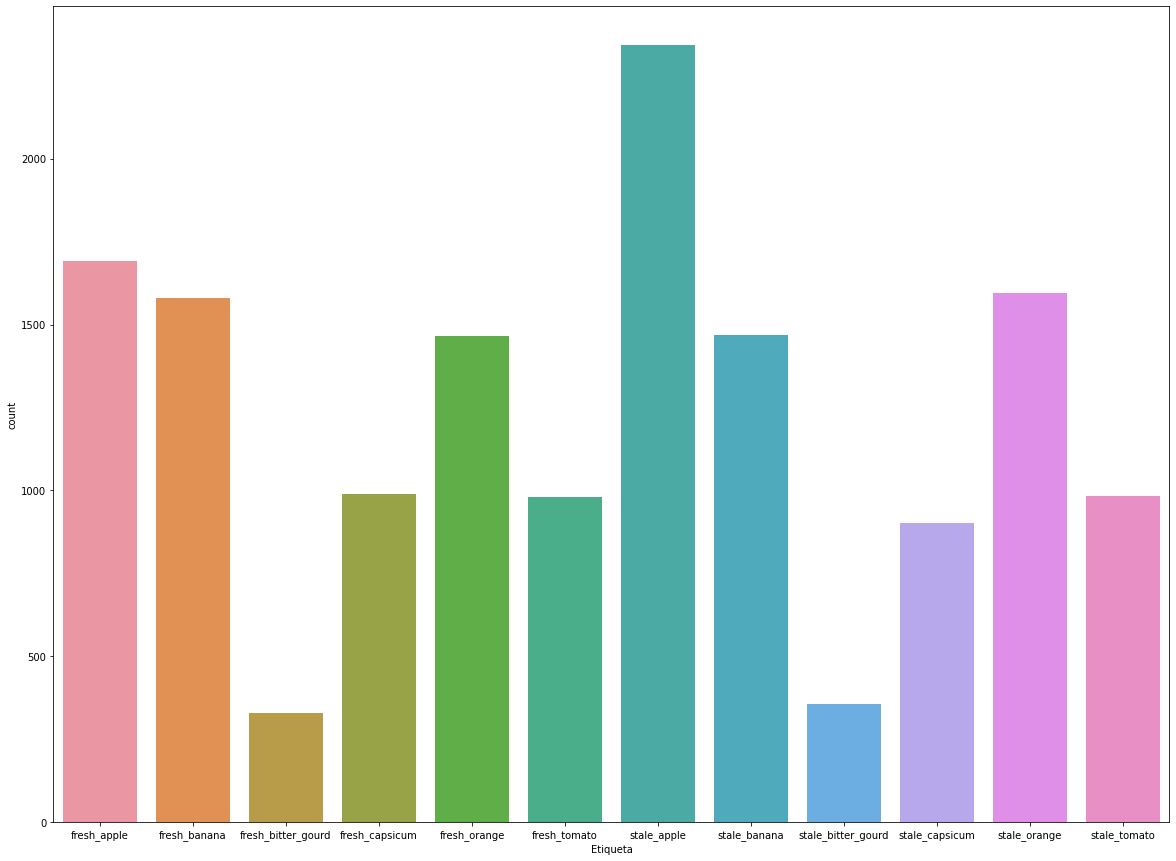

In [12]:
plt.figure(figsize=(20,15))
sns.countplot(x = 'Etiqueta',data=df)

In [13]:
df_aux=df

In [14]:
def eliminar(clase):
    df_i=df_aux.index[df_aux['Etiqueta'] == clase]
    t=len(df_i)-900
    dfindex=pd.DataFrame(df_i).sample(n=t)
    dfa=df_aux.drop(dfindex[0].values)
    return dfa

In [15]:
df_aux=eliminar('stale_apple')

In [16]:
df_aux=eliminar('fresh_apple')

In [17]:
df_aux=eliminar('stale_orange')

In [18]:
df_aux=eliminar('fresh_banana')

In [19]:
df_aux=eliminar('stale_banana')

In [20]:
df_aux=eliminar('fresh_orange')

<AxesSubplot:xlabel='Etiqueta', ylabel='count'>

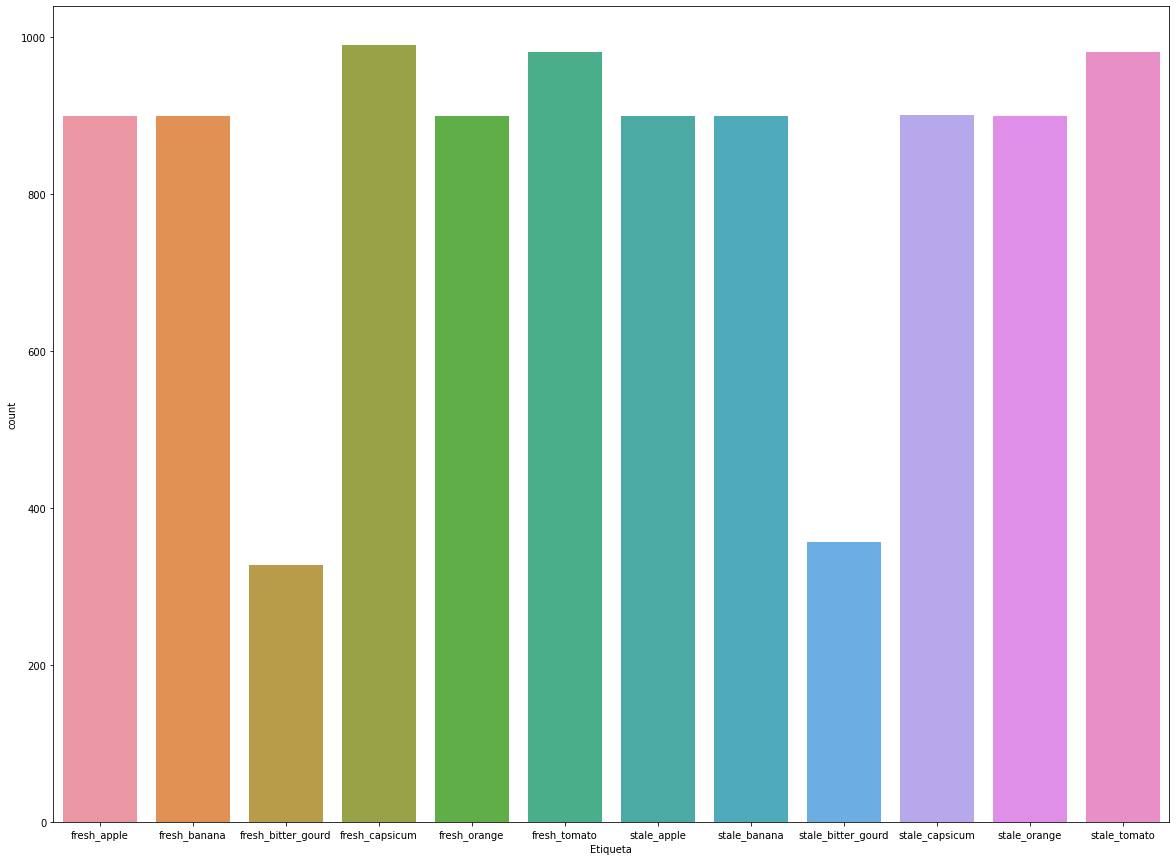

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(x = 'Etiqueta',data=df_aux)

In [22]:
df_aux['Etiqueta'].value_counts()

fresh_capsicum        990
stale_tomato          982
fresh_tomato          981
stale_capsicum        901
fresh_orange          900
fresh_apple           900
stale_orange          900
stale_banana          900
stale_apple           900
fresh_banana          900
stale_bitter_gourd    357
fresh_bitter_gourd    327
Name: Etiqueta, dtype: int64

In [23]:
#Reindexar
df_aux.reset_index(inplace=True, drop=True)

In [24]:
df_aux

,ruta_imagenes,Etiqueta
0,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
1,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
2,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
3,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
4,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
...,...,...
9933,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato
9934,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato
9935,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato
9936,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\stal...,stale_tomato


## Mostrar imágenes

In [59]:
pltimg=[]
def mostrar(dfi, n):    
    fig=plt.figure(figsize=(20, 20))
    for i in range(1,n):
        ruta=dfi['ruta_imagenes'][random.randint(0,( len(dfi.index)-1) )]
        imgcv = cv2.imread(ruta)[:,:,::-1] #BGR (cv2) a RGB (matplotlib )
        pltimg.append(imgcv)
        fig.add_subplot(4, 4, i) 
        plt.imshow(pltimg[(i-1)])

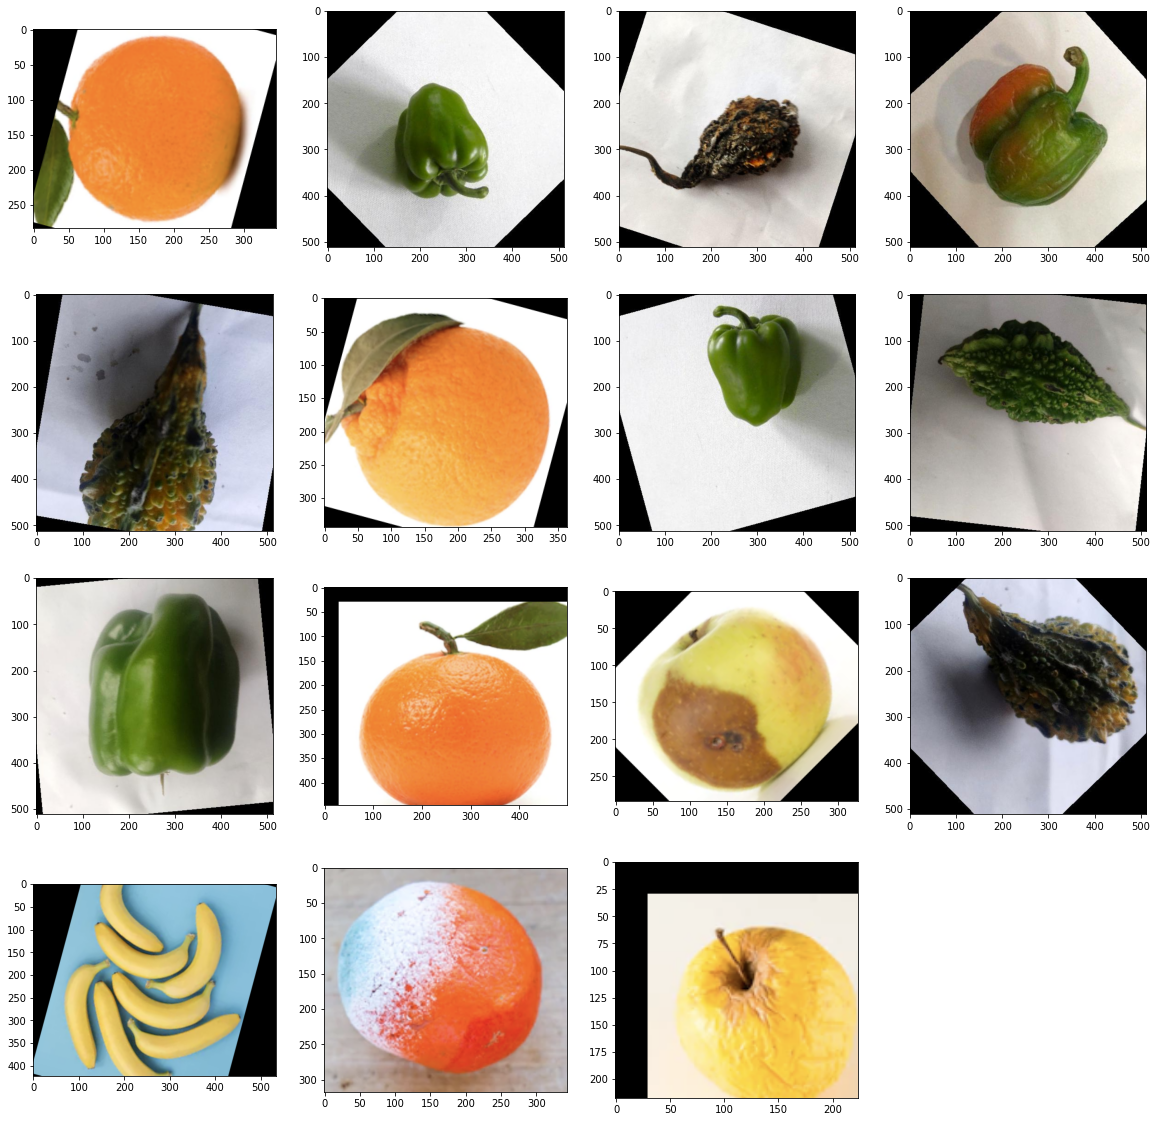

In [60]:
mostrar(df_aux,16)

In [61]:
forma=[]
for i in range(1,16):
    forma.append(pltimg[i-1].shape)
df_pltimg=pd.DataFrame(forma, columns=['Alto', 'Ancho', 'Canal'])
df_pltimg

,Alto,Ancho,Canal
0,284,346,3
1,512,512,3
2,512,512,3
3,512,512,3
4,512,512,3
5,344,364,3
6,512,512,3
7,512,512,3
8,512,512,3
9,446,498,3


In [62]:
pltimg[13]

array([[[193, 190, 187],
        [193, 190, 187],
        [192, 189, 186],
        ...,
        [184, 182, 185],
        [184, 181, 183],
        [183, 179, 181]],

       [[193, 190, 187],
        [193, 190, 187],
        [192, 189, 186],
        ...,
        [184, 182, 184],
        [184, 181, 183],
        [183, 179, 181]],

       [[193, 190, 187],
        [193, 190, 187],
        [192, 189, 186],
        ...,
        [185, 182, 183],
        [184, 181, 182],
        [183, 179, 180]],

       ...,

       [[191, 188, 185],
        [191, 188, 185],
        [192, 188, 185],
        ...,
        [187, 181, 178],
        [186, 181, 177],
        [185, 181, 177]],

       [[190, 187, 184],
        [191, 187, 184],
        [191, 187, 184],
        ...,
        [187, 179, 177],
        [187, 180, 177],
        [185, 181, 177]],

       [[189, 186, 183],
        [190, 187, 183],
        [191, 186, 183],
        ...,
        [187, 176, 174],
        [187, 178, 175],
        [185, 180, 176]]

## Balanceo

In [29]:
#Informacion
dir_imgb=r'C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo'
clasesb=[]

In [30]:
##Obtener clases
clasesb=os.listdir(dir_imgb)
print(clasesb)

['fresh_bitter_gourd', 'stale_bitter_gourd']


In [31]:
dfb=loadImg(clasesb,dir_imgb)

In [32]:
dfb

,ruta_imagenes,Etiqueta
0,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\fr...,fresh_bitter_gourd
1,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\fr...,fresh_bitter_gourd
2,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\fr...,fresh_bitter_gourd
3,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\fr...,fresh_bitter_gourd
4,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\fr...,fresh_bitter_gourd
...,...,...
679,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd
680,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd
681,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd
682,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd


In [33]:
dfb['Etiqueta'].value_counts()

stale_bitter_gourd    357
fresh_bitter_gourd    327
Name: Etiqueta, dtype: int64

In [34]:
#Unir DataFrames
df_f=pd.concat([df_aux, dfb], axis=0)

In [35]:
#Reindexar
df_f.reset_index(inplace=True, drop=True)

In [36]:
df_f

,ruta_imagenes,Etiqueta
0,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
1,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
2,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
3,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
4,C:\Users\kvnsg\Desktop\ML\Proyecto\Images\fres...,fresh_apple
...,...,...
10617,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd
10618,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd
10619,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd
10620,C:\Users\kvnsg\Desktop\ML\Proyecto\Balanceo\st...,stale_bitter_gourd


In [37]:
df_f['Etiqueta'].value_counts()

fresh_capsicum        990
stale_tomato          982
fresh_tomato          981
stale_capsicum        901
fresh_orange          900
fresh_apple           900
stale_banana          900
stale_apple           900
fresh_banana          900
stale_orange          900
stale_bitter_gourd    714
fresh_bitter_gourd    654
Name: Etiqueta, dtype: int64

<AxesSubplot:xlabel='Etiqueta', ylabel='count'>

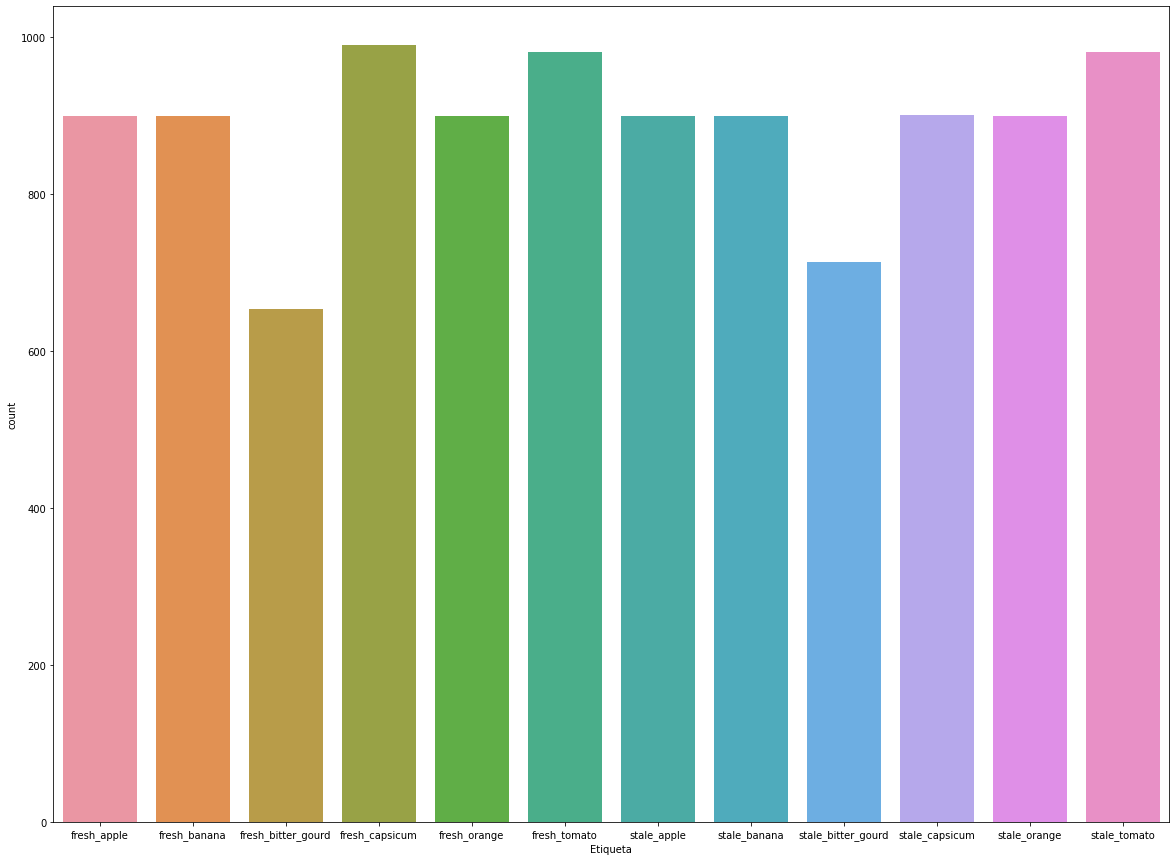

In [38]:
plt.figure(figsize=(20,15))
sns.countplot(x = 'Etiqueta',data=df_f)

## train, test

In [39]:
train_split=0.8 #Porcentaje de datos que se va a tomar para el entrenamiento
train_df, test_df=train_test_split(df_f, train_size=train_split, shuffle=True, random_state=123)
print ('train_df: ', len(train_df), '  test_df: ', len(test_df))

train_df:  8497   test_df:  2125


## Procesamiento de imágenes

In [40]:
# Aumento de datos
#Escalar y Redimensionar

In [41]:
train_datagen=ImageDataGenerator(
    rescale=1/255, #Mayor eficiencia
    rotation_range=5,
    shear_range=0.1, #Inclina las imágenes
    zoom_range=0.01,  #Hacer zoom a las imágenes
)

In [42]:
test_datagen=ImageDataGenerator(
    rescale=1/255
)

In [43]:
def aumentoDatos(df,datagen,bs,x):
    imGen=datagen.flow_from_dataframe( 
        df,
        directory=None,
        x_col=x, 
        y_col='Etiqueta',
        weight_col=None,
        target_size=(128,128),
        color_mode='rgb',
        classes=None,
        class_mode='categorical',
        batch_size=bs)
    return imGen

In [44]:
gen_train=aumentoDatos(train_df,train_datagen,1,'ruta_imagenes')
gen_test=aumentoDatos(test_df,test_datagen,1,'ruta_imagenes')

Found 8497 validated image filenames belonging to 12 classes.
Found 2125 validated image filenames belonging to 12 classes.


In [63]:
pltimg=[]
def mostrarGen(gen, n):    
    fig=plt.figure(figsize=(20, 20))
    for i in range(1,n):
        imgcv,label =next(gen) #BGR (cv2) a RGB (matplotlib )
        pltimg.append(imgcv[0])
        fig.add_subplot(4, 4, i) 
        plt.imshow(pltimg[(i-1)])

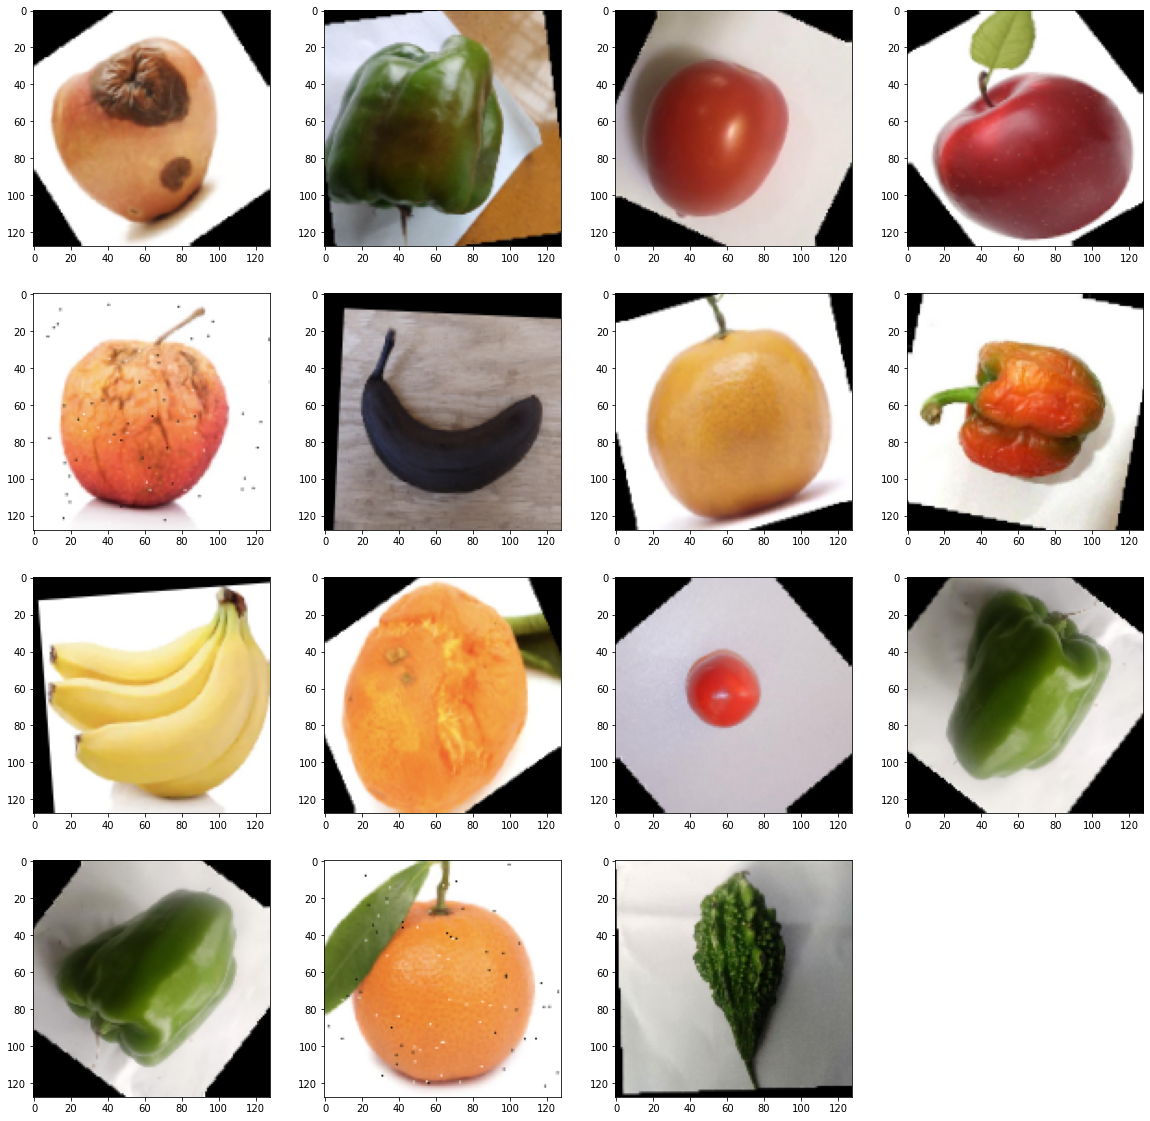

In [64]:
mostrarGen(gen_train, 16)

In [65]:
forma=[]
for i in range(1,16):
    forma.append(pltimg[i-1].shape)
df_pltimg=pd.DataFrame(forma, columns=['Alto', 'Ancho', 'Canal'])
df_pltimg

,Alto,Ancho,Canal
0,128,128,3
1,128,128,3
2,128,128,3
3,128,128,3
4,128,128,3
5,128,128,3
6,128,128,3
7,128,128,3
8,128,128,3
9,128,128,3


In [67]:
pltimg[14]

array([[[0.9763775 , 0.9606912 , 0.95676965],
        [0.9801001 , 0.9644138 , 0.96049225],
        [0.99305916, 0.9774077 , 0.9734861 ],
        ...,
        [0.67238235, 0.6684608 , 0.64885294],
        [0.6640331 , 0.66011155, 0.6405037 ],
        [0.6645444 , 0.66062284, 0.641015  ]],

       [[0.96883667, 0.9531504 , 0.9492288 ],
        [0.98558617, 0.9698999 , 0.9659783 ],
        [0.9937002 , 0.97972447, 0.9758029 ],
        ...,
        [0.6703224 , 0.66640085, 0.646793  ],
        [0.67125773, 0.66733617, 0.6477283 ],
        [0.67202085, 0.6680993 , 0.64849144]],

       [[0.94723004, 0.93154377, 0.9276222 ],
        [0.9486034 , 0.9329171 , 0.92899555],
        [0.98108953, 0.96540326, 0.9614817 ],
        ...,
        [0.6617502 , 0.6578286 , 0.6382208 ],
        [0.6662093 , 0.6622877 , 0.64267987],
        [0.6784314 , 0.6745098 , 0.654902  ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

## CNN

In [78]:
cnn=Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(128,128,3), activation='relu')) #Extración de características
cnn.add(MaxPooling2D(pool_size=(2,2))) #Caracterización

cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Convolution2D(128, (2,2), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten()) #conexión

cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(12, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
cnn.fit_generator(gen_train,epochs=10,verbose=1, validation_data=gen_test,validation_steps=None, shuffle=False, initial_epoch=0)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 8497 steps, validate for 2125 steps
Epoch 1/10
8497/8497 [==============================] - 132s 15ms/step - loss: 1.0932 - accuracy: 0.6042 - val_loss: 0.6322 - val_accuracy: 0.7868
Epoch 2/10
8497/8497 [==============================] - 131s 15ms/step - loss: 0.5285 - accuracy: 0.8176 - val_loss: 0.3959 - val_accuracy: 0.8499
Epoch 3/10
8497/8497 [==============================] - 130s 15ms/step - loss: 0.4096 - accuracy: 0.8605 - val_loss: 0.3866 - val_accuracy: 0.8607
Epoch 4/10
8497/8497 [==============================] - 130s 15ms/step - loss: 0.3452 - accuracy: 0.8821 - val_loss: 0.2447 - val_accuracy: 0.9064
Epoch 5/10
8497/8497 [==============================] - 131s 15ms/step - loss: 0.3130 - accuracy: 0.8989 - val_loss: 0.5338 - val_accuracy: 0.8748
Epoch 6/10
8497/8497 [==============================] - 131s 15ms/step - loss: 0.2845 - accuracy: 0.9099 - val_loss: 0.3822 - val_accuracy: 0.8960
Epoch 7/10
8497/8497 [==============================] - 131s 15ms/step -

## Generar pérdida y accuracy

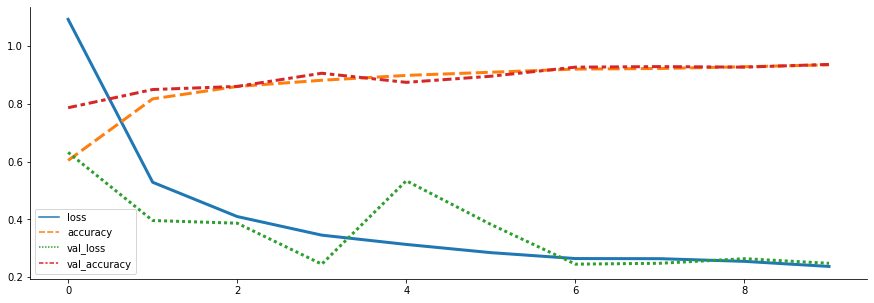

In [80]:
loss=pd.DataFrame(cnn.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()

## Matriz de confusión

In [ ]:
# Determinar y_train, y_train_pred

In [248]:
def etiquetar(index): 
    if(index==0):
        et='fresh_apple'
    if(index==1):
        et='fresh_banana'
    if(index==2):
        et='fresh_bitter_gourd'
    if(index==3):
        et='fresh_capsicum'
    if(index==4):
        et='fresh_orange'
    if(index==5):
        et='fresh_tomato'
    if(index==6):
        et='stale_apple'
    if(index==7):
        et='stale_banana'
    if(index==8):
        et='stale_bitter_gourd'
    if(index==9):
        et='stale_capsicum'
    if(index==10):
        et='stale_orange'
    if(index==11):
        et='stale_tomato'  
    return et

In [250]:
gen_train.class_indices

{'fresh_apple': 0,
 'fresh_banana': 1,
 'fresh_bitter_gourd': 2,
 'fresh_capsicum': 3,
 'fresh_orange': 4,
 'fresh_tomato': 5,
 'stale_apple': 6,
 'stale_banana': 7,
 'stale_bitter_gourd': 8,
 'stale_capsicum': 9,
 'stale_orange': 10,
 'stale_tomato': 11}

In [249]:
lb_real=[]
lb_pred=[]
gen_train.reset()
for i in range(int(len(gen_train))):
    img, label=next(gen_train)
    pred=cnn.predict(img)
    id_real=label[0].tolist().index(1.)
    id_pred=pred[0].tolist().index(max(pred[0].tolist()))
    lb_real.append(etiquetar(id_real))
    lb_pred.append(etiquetar(id_pred))    
y_train=pd.Series(lb_real, name='Etiqueta')
y_train_pred=pd.Series(lb_pred, name='Etiqueta')

In [267]:
imgp, labelp=next(gen_train)

In [268]:
print("Predicción:\n",cnn.predict(img)[0].tolist())
print()
print("Clase real:\n",label[0].tolist())

Predicción:
 [3.058164566027699e-07, 3.051862582093001e-11, 7.629276577896318e-14, 9.418889002077435e-10, 1.45748051214728e-12, 0.9997050166130066, 7.949799964990234e-07, 2.188864023366932e-08, 1.1604527234976292e-11, 1.682236785427449e-07, 6.377170080895667e-08, 0.00029347423696890473]

Clase real:
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [252]:
y_train_pred

0           fresh_capsicum
1             stale_banana
2             stale_tomato
3       fresh_bitter_gourd
4             fresh_orange
               ...        
8492           stale_apple
8493          stale_tomato
8494          stale_banana
8495          stale_banana
8496          fresh_tomato
Name: Etiqueta, Length: 8497, dtype: object

In [251]:
y_train

0           fresh_capsicum
1             stale_banana
2             fresh_tomato
3       fresh_bitter_gourd
4             fresh_orange
               ...        
8492           stale_apple
8493          stale_tomato
8494          stale_banana
8495          stale_banana
8496          fresh_tomato
Name: Etiqueta, Length: 8497, dtype: object

In [258]:
confusion_matrix(y_train, y_train_pred)

array([[689,   6,   1,   0,   2,   0,  14,   0,   0,   0,   0,   0],
       [  2, 703,   0,   0,   1,   1,   2,   4,   0,   0,   9,   0],
       [  0,   0, 527,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 791,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 717,   0,   2,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0, 736,   0,   0,   0,   0,   0,  52],
       [  5,   0,   0,   0,   5,   1, 693,   3,   0,   3,  10,   1],
       [  0,   0,   0,   0,   0,   0,   0, 700,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   1, 566,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 728,   0,   0],
       [  0,   0,   0,   0,  24,   0,  27,   1,   0,   1, 653,   0],
       [  0,   0,   0,   0,   0,   8,   0,   0,   0,   0,   0, 801]],
      dtype=int64)

## Reporte

In [254]:
print(classification_report(y_train,y_train_pred))

                    precision    recall  f1-score   support

       fresh_apple       0.99      0.97      0.98       712
      fresh_banana       0.99      0.97      0.98       722
fresh_bitter_gourd       1.00      1.00      1.00       527
    fresh_capsicum       1.00      1.00      1.00       791
      fresh_orange       0.96      0.99      0.98       721
      fresh_tomato       0.99      0.93      0.96       788
       stale_apple       0.94      0.96      0.95       721
      stale_banana       0.99      1.00      0.99       702
stale_bitter_gourd       1.00      0.99      1.00       570
    stale_capsicum       0.99      1.00      1.00       728
      stale_orange       0.97      0.92      0.95       706
      stale_tomato       0.94      0.99      0.96       809

          accuracy                           0.98      8497
         macro avg       0.98      0.98      0.98      8497
      weighted avg       0.98      0.98      0.98      8497



In [ ]:
##Guardar Modelo

In [270]:
cnn.save('frutas.h5')